**Data Pre-Processing in Excel**

Extracted DAY, DATE and DAILY_TOTAL from Chats Volume Excel sheet.

In [ ]:
#importing pandas and numpy
import pandas as pd 
import numpy as np

**1. Uploading Excel sheets**

In [ ]:
from google.colab import files
uploaded1=files.upload()

Saving Chat_Volume_Feb_cleaned.xlsx to Chat_Volume_Feb_cleaned.xlsx


In [ ]:
uploaded2 = files.upload()

Saving Chat_Volume_March_cleaned.xlsx to Chat_Volume_March_cleaned.xlsx


**2. Reading files with Pandas**

In [ ]:
import io
df1=pd.read_excel(io.BytesIO(uploaded1['Chat_Volume_Feb_cleaned.xlsx']))
df2=pd.read_excel(io.BytesIO(uploaded2['Chat_Volume_March_cleaned.xlsx']))

##**extracting dates** from index by **adding 1** because data provided is monthly day

In [ ]:
df1['DATE_EXTRACTED'] = df1.index + 1 
df2['DATE_EXTRACTED'] = df2.index + 1 

##marking **weekends as 1 and weekdays as 0**

In [ ]:
df1['Weekend'] = np.where(((df1['DAY'] == 'Saturday') | (df1['DAY'] == 'Sunday')), 1, 0)
df2['Weekend'] = np.where(((df2['DAY'] == 'Saturday') | (df2['DAY'] == 'Sunday')), 1, 0)

In [ ]:
#dropping DATE and DAY column from datasheet
df1.drop(['DATE' , 'DAY'], axis=1, inplace=True)
df2.drop(['DATE' , 'DAY'], axis=1, inplace=True)

In [ ]:
df1

,DAILY_TOTAL,DATE_EXTRACTED,Weekend
0,513,1,0
1,406,2,0
2,419,3,0
3,357,4,0
4,335,5,0
5,40,6,1
6,59,7,1
7,447,8,0
8,406,9,0
9,372,10,0


In [ ]:
df2

,DAILY_TOTAL,DATE_EXTRACTED,Weekend
0,557,1,0
1,884,2,0
2,471,3,0
3,430,4,0
4,334,5,0
5,53,6,1
6,74,7,1
7,575,8,0
8,491,9,0
9,402,10,0


In [ ]:
#concatinating two datasets together
DAILY_CHAT_DATASET = pd.concat([df1 , df2] , axis = 0)
#resetting index because the data of both the months have same index
DAILY_CHAT_DATASET = DAILY_CHAT_DATASET.reset_index()
#Dropping index column from the dataset
DAILY_CHAT_DATASET.drop(['index'], axis=1, inplace=True)

In [ ]:
DAILY_CHAT_DATASET

,DAILY_TOTAL,DATE_EXTRACTED,Weekend
0,513,1,0
1,406,2,0
2,419,3,0
3,357,4,0
4,335,5,0
5,40,6,1
6,59,7,1
7,447,8,0
8,406,9,0
9,372,10,0


Now we should **analyse** our dataset.

We will import **seaborn library to plot a boxplot** which will describe to us about outliers.

Checking for the Outliers is important step which will help us in deciding best evaluation metrics.


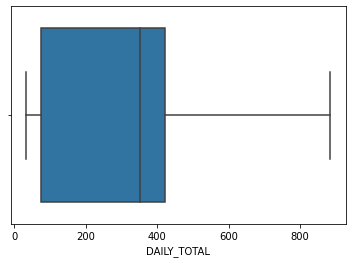

In [ ]:
import seaborn as sns
sns.boxplot(x = DAILY_CHAT_DATASET["DAILY_TOTAL"])

Our dataset has **No Outliers**

**3. Applying RANDOM FOREST REGRESSION on the data**

We will use Random Forest Regressor as our model to predict the data(number of chats per hour).

Also, we will measure our performance using R2 score and will measuring Error by various methods such as Mean_Squared_Error , Root_Mean_Squared_Error, Mean_Absolute_Error.

Because our data has Outlier, **Mean Absolute Error will be the best metric to evaluate our result.**

**No Validation Set** , because dataset is not large

In [ ]:
#HERE WE IMPORT IT FROM SKLEARN
from sklearn.model_selection import train_test_split as tts

# HERE WE SPLIT DATA INTO TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = tts(DAILY_CHAT_DATASET.drop('DAILY_TOTAL',axis = 1),DAILY_CHAT_DATASET['DAILY_TOTAL'],test_size = 0.3,random_state = 1)


from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.ensemble import RandomForestRegressor

#WE have INITIALIZE THE Random Forest Regressor with no: of trees as 200, max_depth as 9, n_jobs as -1(read documentation for more details) and random state as 1 
rfr = RandomForestRegressor(n_estimators= 200 , max_depth=9 , n_jobs=-1 , random_state= 1)

# FIT THE DATA using FIT METHOD
# Calculate the R2_score, mse, mae for training data as well as testing data.
rfr.fit(X_train , y_train)

mae_train = mean_absolute_error((y_train) ,(rfr.predict(X_train)))
mae_test = mean_absolute_error((y_test) , (rfr.predict(X_test)))
mse_train = mean_squared_error((y_train) ,(rfr.predict(X_train)))
mse_test = mean_squared_error((y_test) , (rfr.predict(X_test)))
rmse_train = np.sqrt(mean_squared_error((y_train) ,(rfr.predict(X_train))))
rmse_test = np.sqrt(mean_squared_error((y_test) , (rfr.predict(X_test))))
R_score_train = r2_score((y_train) , (rfr.predict(X_train)))
R_score_test = r2_score((y_test) , (rfr.predict(X_test)))


print("ACCURACY : ")
print("Mean Absolute Error Training Set")
print(mae_train)
print("Mean Absolute Error Test Set")
print(mae_test)

print("")
print("Higher the value greater the accuracy")
print("R2 Score Training Set")
print(R_score_train)
print("R2 Score Test Set")
print(R_score_test)

print("")
print("")
print("")
print("Mean Squared Error Training Set")
print(mse_train)
print("Mean Squared Error Test Set")
print(mse_test)




ACCURACY : 
Mean Absolute Error Training Set
29.53965040650407
Mean Absolute Error Test Set
75.21752116402118

Higher the value greater the accuracy
R2 Score Training Set
0.9008756405408486
R2 Score Test Set
0.7254849491670088



Mean Squared Error Training Set
3638.293865190987
Mean Squared Error Test Set
8335.735092679992


#Calculating Number of Engineers required

In [ ]:
data = [[15 , 0] , ]

 Predicting for **Date = 15** and **Weekday**(not weekend)

In [ ]:
rfr.predict(data)

array([395.228875])

##Further Procesing

The model predicts the number of chats.

Average Handling Time of chat is given 23 minutes.

Engineers works for 7 hours 30 minutes (= 450 minutes) per day.

The number of minutes workers are required per day = the number of chat * Average Handling Time of chat

Thus, the number of resourses required = (The number of minutes workers are required) / (Number of minutes each workers works per day)

In [ ]:
number_of_chats=395.228875
number_of_resourses_required=(number_of_chats)*23/450
number_of_resourses_required

20.200586944444442

# *`21 Engineers required on Date 15 with Weekday for handling Chat`*